<a href="https://colab.research.google.com/github/PSRINIVAS07/Basic-Chatbot/blob/main/thermal_conductivity_model%204%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**DATA SET**

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [10]:
from google.colab import files

uploaded = files.upload()


Saving thermal_conductivity_final dataset.xlsm to thermal_conductivity_final dataset (1).xlsm


In [11]:
import os
os.listdir()


['.config',
 'thermal_conductivity_final dataset (1).xlsm',
 'thermal_conductivity_final dataset.xlsm',
 'sample_data']

In [12]:
import pandas as pd

tc_data = pd.read_excel("thermal_conductivity_final dataset.xlsm")
tc_data.head()


,Y_thermal_conductivity,X1_Temperature_C,X2_Concentration,X3_BaseFluid
0,0.2582,30,0.5,0.251
1,0.2632,35,0.5,0.253
2,0.2676,40,0.5,0.255
3,0.2710,45,0.5,0.257
4,0.2750,50,0.5,0.259


In [13]:
X = tc_data[['X1_Temperature_C',
          'X2_Concentration',
          'X3_BaseFluid']]


In [14]:
tc_data['X3_BaseFluid'].nunique()


32

GAUSSIAN PROCESS REGRESSION (GPR)

In [15]:
import numpy as np
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [16]:
# STEP 2: Select input features (3 columns)
X = tc_data[['X1_Temperature_C',
             'X2_Concentration',
             'X3_BaseFluid']]

# STEP 2: Select output variable
y = tc_data['Y_thermal_conductivity'].values.reshape(-1, 1)


In [17]:
# STEP 3: Initialize scalers
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# STEP 3: Scale input and output data
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y).ravel()


In [18]:
# STEP 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)


In [19]:
# STEP 5: Define kernel (Constant × RBF + Noise)
kernel = C(1.0, (1e-3, 1e3)) * \
         RBF(length_scale=[1.0, 1.0, 1.0],
             length_scale_bounds=(1e-2, 1e2)) + \
         WhiteKernel(noise_level=1e-6)


In [20]:
# STEP 6: Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=10,
    random_state=42
)

# STEP 6: Train the model
gpr.fit(X_train, y_train)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1]) + WhiteKernel(noise_level=1e-06),
                         n_restarts_optimizer=10, random_state=42)

In [21]:
# STEP 7: Predict on training and testing data (scaled)
y_train_pred_scaled = gpr.predict(X_train)
y_test_pred_scaled = gpr.predict(X_test)

# STEP 7: Convert predictions back to original scale
y_train_pred = y_scaler.inverse_transform(
    y_train_pred_scaled.reshape(-1, 1)
).ravel()

y_test_pred = y_scaler.inverse_transform(
    y_test_pred_scaled.reshape(-1, 1)
).ravel()

# STEP 7: Convert true y values back to original scale
y_train_true = y_scaler.inverse_transform(
    y_train.reshape(-1, 1)
).ravel()

y_test_true = y_scaler.inverse_transform(
    y_test.reshape(-1, 1)
).ravel()


In [22]:
# STEP 8: Define evaluation function
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [23]:
print("TRAINING RESULTS (GPR – 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_true, y_train_pred))

print("\nTESTING RESULTS (GPR – 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true, y_test_pred))


TRAINING RESULTS (GPR – 3 FEATURES)
MSE, RMSE, MAE, R2 = (1.132145021286413e-06, np.float64(0.0010640230360694327), 0.0005672115929676444, 0.9980460535888419)

TESTING RESULTS (GPR – 3 FEATURES)
MSE, RMSE, MAE, R2 = (3.475080704673083e-05, np.float64(0.005894981513688642), 0.0020139807873385948, 0.8401550416975326)


MULTIPLE LINEAR REGRESSION (MLR) — WITH 3 INPUT COLUMNS

In [24]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import ML utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [25]:
# STEP 2: Define a reusable evaluation function
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)   # Mean Squared Error
    rmse = np.sqrt(mse)                        # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)              # Coefficient of Determination
    return mse, rmse, mae, r2


In [26]:
# STEP 3A: Select input features (Temperature, Concentration, Base Fluid)
X_tc = tc_data[['X1_Temperature_C',
                'X2_Concentration',
                'X3_BaseFluid']]

# STEP 3A: Select target variable (Thermal Conductivity)
y_tc = tc_data['Y_thermal_conductivity']


In [27]:
# STEP 4A: Initialize scaler for input features
scaler_tc = MinMaxScaler()

# STEP 4A: Scale input features
X_tc_scaled = scaler_tc.fit_transform(X_tc)


In [28]:
# STEP 5A: Split dataset into training and testing sets
X_train_tc, X_test_tc, y_train_tc, y_test_tc = train_test_split(
    X_tc_scaled, y_tc, test_size=0.2, random_state=42
)


In [29]:
# STEP 6A: Initialize Multiple Linear Regression model
mlr_tc = LinearRegression()

# STEP 6A: Fit model on training data
mlr_tc.fit(X_train_tc, y_train_tc)


LinearRegression()

In [30]:
# STEP 7A: Predict thermal conductivity for training data
y_train_pred_tc = mlr_tc.predict(X_train_tc)

# STEP 7A: Predict thermal conductivity for testing data
y_test_pred_tc = mlr_tc.predict(X_test_tc)


In [31]:
# STEP 8A: Display training performance
print("TRAINING RESULTS (MLR – TC, 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_tc, y_train_pred_tc))

# STEP 8A: Display testing performance
print("\nTESTING RESULTS (MLR – TC, 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_tc, y_test_pred_tc))


TRAINING RESULTS (MLR – TC, 3 FEATURES)
MSE, RMSE, MAE, R2 = (6.1471879941372e-05, np.float64(0.007840400496235635), 0.004807021431316456, 0.8939069139198204)

TESTING RESULTS (MLR – TC, 3 FEATURES)
MSE, RMSE, MAE, R2 = (5.482859341361168e-05, np.float64(0.007404633239642034), 0.0052037244522997106, 0.7478022822262433)


In [32]:
# STEP 9A: Extract regression coefficients
a, b, d = mlr_tc.coef_
c = mlr_tc.intercept_

# STEP 9A: Print final MLR equation for thermal conductivity
print("\nFinal MLR Equation (Thermal Conductivity):")
print(f"k = {a:.6f}*T + {b:.6f}*φ + {d:.6f}*BF + {c:.6f}")



Final MLR Equation (Thermal Conductivity):
k = -0.026277*T + 0.024444*φ + 0.103699*BF + 0.244241


Random Forest R


In [33]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import Random Forest and utilities
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# STEP 2: Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)     # Mean Squared Error
    rmse = np.sqrt(mse)                          # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)    # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)                # R-squared
    return mse, rmse, mae, r2


In [34]:
# STEP 3A: Select input features (3 features)
X_tc = tc_data[['X1_Temperature_C',
                'X2_Concentration',
                'X3_BaseFluid']]

# STEP 3A: Select target variable
y_tc = tc_data['Y_thermal_conductivity']


In [35]:
# STEP 4A: Split TC data into training and testing sets
X_train_tc, X_test_tc, y_train_tc, y_test_tc = train_test_split(
    X_tc, y_tc, test_size=0.2, random_state=42
)


In [36]:
# STEP 5A: Initialize Random Forest model
rf_tc = RandomForestRegressor(random_state=42)

# STEP 5A: Define hyperparameter grid
param_grid_tc = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [37]:
# STEP 6A: Perform GridSearchCV
grid_tc = GridSearchCV(
    rf_tc,
    param_grid_tc,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# STEP 6A: Train model
grid_tc.fit(X_train_tc, y_train_tc)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 500]},
             scoring='r2')

In [38]:
# STEP 7A: Extract best RF model
best_rf_tc = grid_tc.best_estimator_

print("Best RF parameters (TC):")
print(grid_tc.best_params_)


Best RF parameters (TC):
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [39]:
# STEP 8A: Predict TC values
y_train_pred_tc = best_rf_tc.predict(X_train_tc)
y_test_pred_tc = best_rf_tc.predict(X_test_tc)


In [40]:
# STEP 9A: Display training performance
print("TRAINING RESULTS (RF – TC, 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_tc, y_train_pred_tc))

# STEP 9A: Display testing performance
print("\nTESTING RESULTS (RF – TC, 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_tc, y_test_pred_tc))


TRAINING RESULTS (RF – TC, 3 FEATURES)
MSE, RMSE, MAE, R2 = (3.4972750952203657e-06, np.float64(0.0018701002901503347), 0.001172549268292794, 0.9939641229766008)

TESTING RESULTS (RF – TC, 3 FEATURES)
MSE, RMSE, MAE, R2 = (2.5957189823845365e-05, np.float64(0.0050948199010215625), 0.0031559192307690494, 0.8806034657134065)


In [41]:
# STEP 10A: Display feature importance
feature_importance_tc = pd.DataFrame({
    'Feature': X_tc.columns,
    'Importance': best_rf_tc.feature_importances_
})

feature_importance_tc


,Feature,Importance
0,X1_Temperature_C,0.027434
1,X2_Concentration,0.103362
2,X3_BaseFluid,0.869204



XGBOOST REGRESSION

In [42]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import XGBoost regressor
from xgboost import XGBRegressor

# STEP 1: Import utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# STEP 2: Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)     # Mean Squared Error
    rmse = np.sqrt(mse)                          # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)    # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)                # R-squared
    return mse, rmse, mae, r2


In [43]:
# STEP 3A: Load TC dataset
tc_data = pd.read_excel("thermal_conductivity_final dataset.xlsm")

# STEP 3A: Input features (3 features)
X_tc = tc_data[['X1_Temperature_C',
                'X2_Concentration',
                'X3_BaseFluid']]

# STEP 3A: Target variable
y_tc = tc_data['Y_thermal_conductivity']


In [44]:
# STEP 4A: Split TC dataset
X_train_tc, X_test_tc, y_train_tc, y_test_tc = train_test_split(
    X_tc, y_tc, test_size=0.2, random_state=42
)


In [45]:
# STEP 5A: Initialize XGBoost regressor
xgb_tc = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# STEP 5A: Hyperparameter grid
param_grid_xgb = {
    'n_estimators': [200, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [46]:
# STEP 6A: GridSearchCV
grid_tc = GridSearchCV(
    xgb_tc,
    param_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# STEP 6A: Train model
grid_tc.fit(X_train_tc, y_train_tc)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [200, 400], 'subsample': [0.8, 1.0]},
             scoring='r2')

In [47]:
# STEP 7A: Best XGBoost model
best_xgb_tc = grid_tc.best_estimator_

print("Best XGBoost parameters (TC):")
print(grid_tc.best_params_)

# STEP 7A: Predictions
y_train_pred_tc = best_xgb_tc.predict(X_train_tc)
y_test_pred_tc = best_xgb_tc.predict(X_test_tc)


Best XGBoost parameters (TC):
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.8}


In [48]:
print("TRAINING RESULTS (XGBOOST – TC)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_tc, y_train_pred_tc))

print("\nTESTING RESULTS (XGBOOST – TC)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_tc, y_test_pred_tc))


TRAINING RESULTS (XGBOOST – TC)
MSE, RMSE, MAE, R2 = (8.104918488129024e-07, np.float64(0.0009002732078724227), 0.0006307820466669602, 0.9986011883553032)

TESTING RESULTS (XGBOOST – TC)
MSE, RMSE, MAE, R2 = (6.9881513712165645e-06, np.float64(0.002643511182351337), 0.0017079411676296859, 0.9678562640849941)


POLYNOMIAL REGRESSION (DEGREE = 2)

Degree = 2

Ridge Regression (to avoid overfitting)

3 input features

In [49]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import preprocessing and models
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# STEP 2: Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [50]:
# STEP 3A: Input features
X_tc = tc_data[['X1_Temperature_C',
                'X2_Concentration',
                'X3_BaseFluid']]

# STEP 3A: Target variable
y_tc = tc_data['Y_thermal_conductivity']

In [51]:
# STEP 4A: Train–test split
X_train_tc, X_test_tc, y_train_tc, y_test_tc = train_test_split(
    X_tc, y_tc, test_size=0.2, random_state=42
)


In [52]:
# STEP 5A: Scale features
scaler_tc = MinMaxScaler()
X_train_tc_scaled = scaler_tc.fit_transform(X_train_tc)
X_test_tc_scaled = scaler_tc.transform(X_test_tc)


In [53]:
# STEP 6A: Generate polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_tc_poly = poly.fit_transform(X_train_tc_scaled)
X_test_tc_poly = poly.transform(X_test_tc_scaled)


In [54]:
# STEP 7A: Train Ridge regression (regularized polynomial model)
poly_tc_model = Ridge(alpha=1.0)

poly_tc_model.fit(X_train_tc_poly, y_train_tc)


Ridge()

In [55]:
# STEP 8A: Predictions
y_train_pred_tc = poly_tc_model.predict(X_train_tc_poly)
y_test_pred_tc = poly_tc_model.predict(X_test_tc_poly)

# STEP 8A: Evaluation
print("TRAINING RESULTS (Polynomial – TC)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_tc, y_train_pred_tc))

print("\nTESTING RESULTS (Polynomial – TC)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_tc, y_test_pred_tc))


TRAINING RESULTS (Polynomial – TC)
MSE, RMSE, MAE, R2 = (5.487907970237716e-05, np.float64(0.007408041556469372), 0.004981003752368644, 0.9052852957739657)

TESTING RESULTS (Polynomial – TC)
MSE, RMSE, MAE, R2 = (4.515724749870334e-05, np.float64(0.006719914247868297), 0.0049712472891765705, 0.7922880371158609)


In [56]:
# STEP 9A: Extract polynomial feature names
feature_names = poly.get_feature_names_out(X_tc.columns)

# STEP 9A: Create readable equation
coefficients = poly_tc_model.coef_
intercept = poly_tc_model.intercept_

poly_equation_tc = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print("Polynomial Regression Equation (TC):")
print(f"Intercept = {intercept:.6f}")
poly_equation_tc


Polynomial Regression Equation (TC):
Intercept = 0.246726


,Feature,Coefficient
0,X1_Temperature_C,0.003618
1,X2_Concentration,0.025383
2,X3_BaseFluid,0.051628
3,X1_Temperature_C^2,-0.020279
4,X1_Temperature_C X2_Concentration,-0.005339
5,X1_Temperature_C X3_BaseFluid,0.005938
6,X2_Concentration^2,-0.010825
7,X2_Concentration X3_BaseFluid,0.023830
8,X3_BaseFluid^2,0.036819


Gaussian Mse

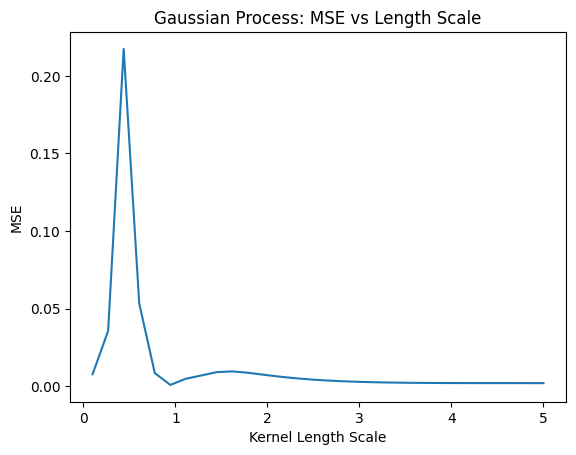

In [57]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

length_scales = np.linspace(0.1, 5, 30)
mse_gp = []

for l in length_scales:
    # Set length_scale_bounds='fixed' to prevent the GPR from optimizing this parameter
    # This allows us to observe the MSE for the specific length_scale 'l'
    kernel = RBF(length_scale=l, length_scale_bounds='fixed')
    model = GaussianProcessRegressor(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_gp.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(length_scales, mse_gp)
plt.xlabel("Kernel Length Scale")
plt.ylabel("MSE")
plt.title("Gaussian Process: MSE vs Length Scale")
plt.show()

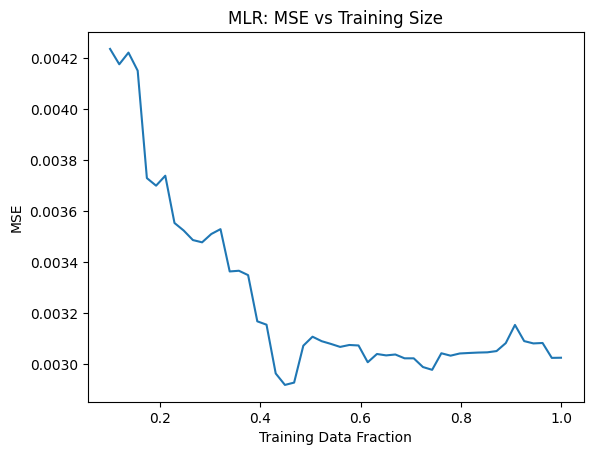

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Increased the number of points for train_sizes to make the graph smoother
train_sizes = np.linspace(0.1, 1.0, 50)
mse_mlr = []

for size in train_sizes:
    split = int(len(X_train) * size)
    model = LinearRegression()
    model.fit(X_train[:split], y_train[:split])
    y_pred = model.predict(X_test)
    mse_mlr.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(train_sizes, mse_mlr)
plt.xlabel("Training Data Fraction")
plt.ylabel("MSE")
plt.title("MLR: MSE vs Training Size")
plt.show()

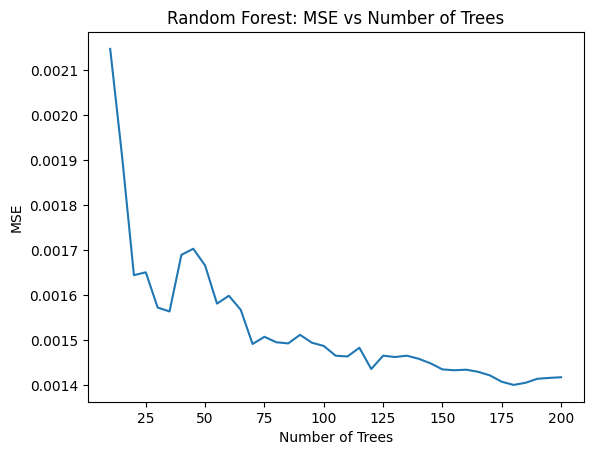

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Increased the number of points for 'trees' to make the graph smoother and more detailed
trees = range(10, 201, 5) # Changed step from 10 to 5
mse_rf = []

for t in trees:
    model = RandomForestRegressor(
        n_estimators=t,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_rf.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(trees, mse_rf)
plt.xlabel("Number of Trees")
plt.ylabel("MSE")
plt.title("Random Forest: MSE vs Number of Trees")
plt.show()

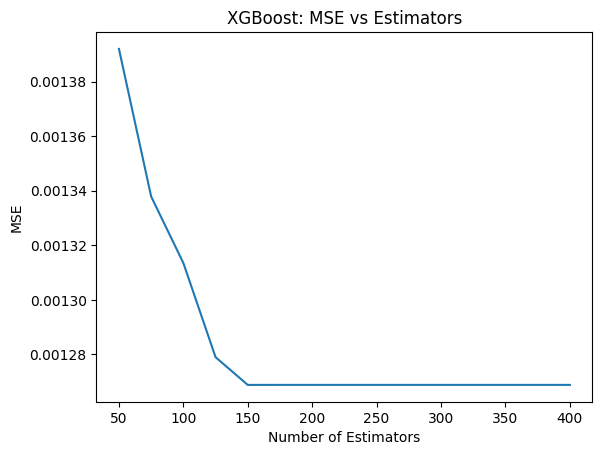

In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Increased the number of points for 'estimators' to make the graph smoother and more detailed
estimators = range(50, 401, 25) # Changed step from 50 to 25
mse_xgb = []

for e in estimators:
    model = XGBRegressor(
        n_estimators=e,
        learning_rate=0.1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_xgb.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(estimators, mse_xgb)
plt.xlabel("Number of Estimators")
plt.ylabel("MSE")
plt.title("XGBoost: MSE vs Estimators")
plt.show()

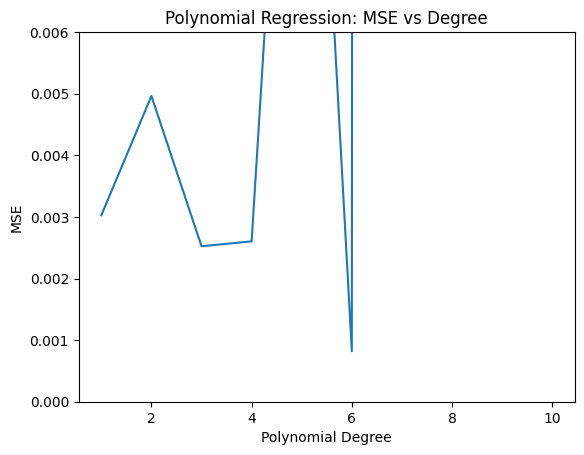

In [62]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparation steps to ensure X_train, y_train etc. are defined
tc_data = pd.read_excel("thermal_conductivity_final dataset.xlsm")

X = tc_data[['X1_Temperature_C', 'X2_Concentration', 'X3_BaseFluid']]
y = tc_data['Y_thermal_conductivity'].values.reshape(-1, 1)

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y).ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

degrees = range(1, 11)
mse_poly = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse_poly.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(degrees, mse_poly)
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Polynomial Regression: MSE vs Degree")
# Limiting the y-axis to better visualize the lower MSE values
plt.ylim(0, 0.006) # Adjusted the upper limit to focus on the optimal range
plt.show()

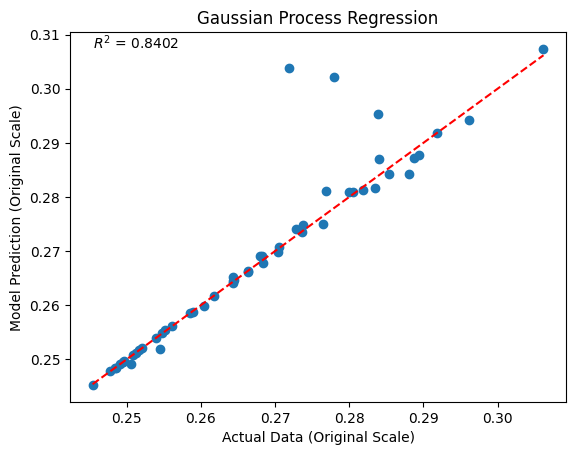

In [61]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import r2_score # Import r2_score
import matplotlib.pyplot as plt

# Reusing the successfully trained gpr model and inverse-transformed predictions/true values
# These were computed in cells C3cs04CSYN1s (gpr fitting) and VrhGcW8cYShD (inverse transform)
y_pred_gp = y_test_pred
y_true_gp = y_test_true

r2_gp = r2_score(y_true_gp, y_pred_gp)

plt.figure()
plt.scatter(y_true_gp, y_pred_gp)
plt.plot([y_true_gp.min(), y_true_gp.max()],
         [y_true_gp.min(), y_true_gp.max()],
         'r--')
plt.xlabel("Actual Data (Original Scale)")
plt.ylabel("Model Prediction (Original Scale)")
plt.title("Gaussian Process Regression")
plt.text(y_true_gp.min(), y_pred_gp.max(), f"$R^2$ = {r2_gp:.4f}")
plt.show()

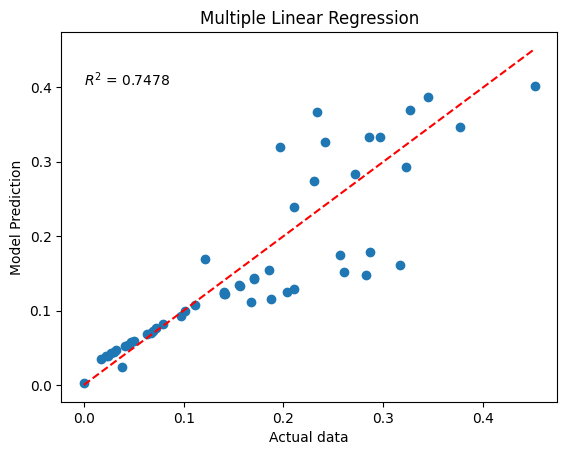

In [63]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred_mlr = mlr_model.predict(X_test)

r2_mlr = r2_score(y_test, y_pred_mlr)

plt.figure()
plt.scatter(y_test, y_pred_mlr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual data")
plt.ylabel("Model Prediction")
plt.title("Multiple Linear Regression")
plt.text(y_test.min(), y_pred_mlr.max(), f"$R^2$ = {r2_mlr:.4f}")
plt.show()


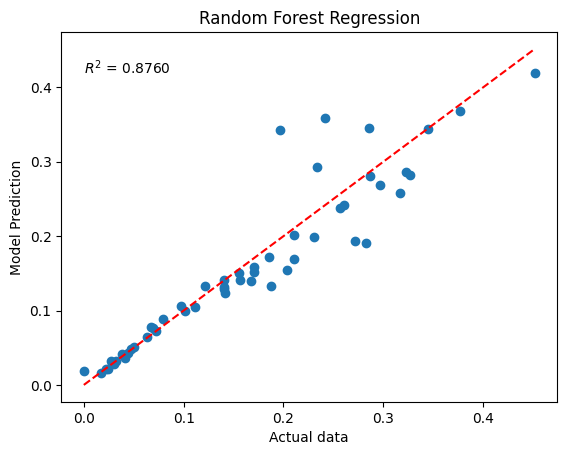

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual data")
plt.ylabel("Model Prediction")
plt.title("Random Forest Regression")
plt.text(y_test.min(), y_pred_rf.max(), f"$R^2$ = {r2_rf:.4f}")
plt.show()


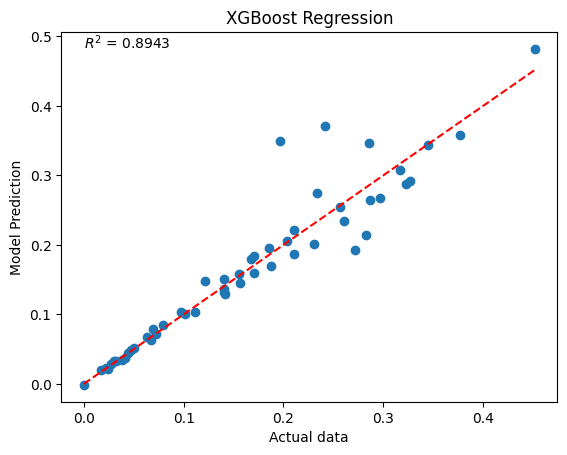

In [65]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)

plt.figure()
plt.scatter(y_test, y_pred_xgb)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual data")
plt.ylabel("Model Prediction")
plt.title("XGBoost Regression")
plt.text(y_test.min(), y_pred_xgb.max(), f"$R^2$ = {r2_xgb:.4f}")
plt.show()


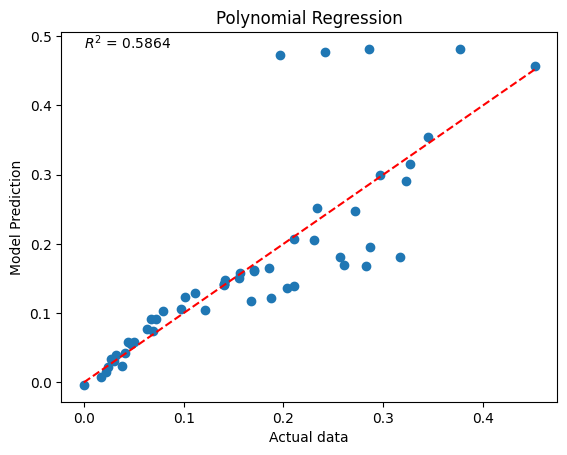

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)

plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual data")
plt.ylabel("Model Prediction")
plt.title("Polynomial Regression")
plt.text(y_test.min(), y_pred_poly.max(), f"$R^2$ = {r2_poly:.4f}")
plt.show()
